In [1]:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import random

In [2]:
car_dataset = pd.read_csv("cars_final.csv")
car_dataset.head()

,_id,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Power_Seats,Ambient_Lightning,Heads-Up_Display,Welcome_Lights,Heated_Seats,USB_Ports,Engine_Type,Electric_Range,Battery,Launch_Date
0,6285d2947b880c3221d741b9,Tata,Nano Genx,Xt,292667,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-12
1,6285d2947b880c3221d741ba,Tata,Nano Genx,Xe,236447,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-13
2,6285d2947b880c3221d741bb,Tata,Nano Genx,Emax Xm,296661,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-07-31
3,6285d2947b880c3221d741bc,Tata,Nano Genx,Xta,334768,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-25
4,6285d2947b880c3221d741bd,Tata,Nano Genx,Xm,272223,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-03-23


In [10]:
customer_dataset = pd.read_csv("customer.csv")
customer_dataset.drop("indices",axis=1,inplace=True)
customer_dataset.head()

,_id,Gender,Age,SpendingScore,FamilySize
0,6283d2b4d56796d953b303b5,Male,22,Low,4.0
1,6283d2b4d56796d953b303b6,Female,38,Average,3.0
2,6283d2b4d56796d953b303b7,Female,67,Low,1.0
3,6283d2b4d56796d953b303b8,Male,67,High,2.0
4,6283d2b4d56796d953b303b9,Female,40,High,6.0


In [4]:
body_type = car_dataset["Body_Type"].unique()
fuel_type = car_dataset["Fuel_Type"].unique()
transmission_type = car_dataset["Type"].unique()
company_names = car_dataset["Make"].unique()
print(body_type)
print(fuel_type)
print(transmission_type)
print(company_names)

['Hatchback' 'MPV' 'MUV' 'SUV' 'Sedan' 'Crossover' nan 'Coupe'
 'Convertible' 'Sports, Hatchback' 'Sedan, Coupe' 'Sports'
 'Crossover, SUV' 'SUV, Crossover' 'Sedan, Crossover'
 'Sports, Convertible' 'Pick-up' 'Coupe, Convertible']
['Petrol' 'CNG' 'Diesel' 'CNG + Petrol' 'Hybrid' 'Electric']
['Manual' 'Automatic' 'AMT' 'CVT' 'DCT' nan]
['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' 'Mercedes-Benz' 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw'
 'Land Rover' 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley'
 'Ferrari' 'Aston Martin' 'Rolls-Royce' 'Bugatti' 'Bajaj' 'Icml' 'Force'
 'Mg' 'Kia' 'Land Rover Rover' 'Mitsubishi']


In [5]:
car_dataset["Make"].nunique()

40

<AxesSubplot:xlabel='Make'>

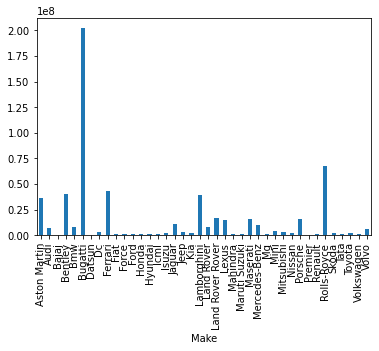

In [6]:
car_dataset.groupby("Make")["Ex-Showroom_Price"].mean().plot(kind="bar")

In [7]:
x = car_dataset["Ex-Showroom_Price"].min()
y = car_dataset["Ex-Showroom_Price"].max()
print(x,y)

236447 212155397


In [8]:
difference = (y-x)/100
low_min = x
low_max = x + difference-1
mid_min = low_max + 1
mid_max = mid_min + (difference*10) -1
high_min = mid_max + 1
high_max = high_min + difference*100

#print
print(low_min,low_max)
print(mid_min,mid_max)
print(high_min,high_max)

236447 2355635.5
2355636.5 23547530.5
23547531.5 235466481.5


In [11]:
print("for car dataset: ",car_dataset["Seating_Capacity"].min(),car_dataset["Seating_Capacity"].max())
print("for customer dataset: ",customer_dataset["FamilySize"].min(),customer_dataset["FamilySize"].max())

for car dataset:  2.0 16.0
for customer dataset:  1.0 9.0


In [12]:
print("for car dataset: ",car_dataset["Seating_Capacity"].unique())
print("for customer dataset: ",customer_dataset["FamilySize"].unique())
print(customer_dataset["SpendingScore"].unique())

for car dataset:  [ 4.  5.  7. nan  2.  6.  9.  8. 16.]
for customer dataset:  [ 4.  3.  1.  2.  6. nan  5.  8.  7.  9.]
['Low' 'Average' 'High']


In [13]:
len(customer_dataset)

10695

In [14]:
customer_dataset.head()

,_id,Gender,Age,SpendingScore,FamilySize
0,6283d2b4d56796d953b303b5,Male,22,Low,4.0
1,6283d2b4d56796d953b303b6,Female,38,Average,3.0
2,6283d2b4d56796d953b303b7,Female,67,Low,1.0
3,6283d2b4d56796d953b303b8,Male,67,High,2.0
4,6283d2b4d56796d953b303b9,Female,40,High,6.0


In [15]:
sample = car_dataset[["Body_Type","Fuel_Type","Type","Make","Seating_Capacity","Ex-Showroom_Price"]]
print(sample.iat[0,3])
sample.head()

Tata


,Body_Type,Fuel_Type,Type,Make,Seating_Capacity,Ex-Showroom_Price
0,Hatchback,Petrol,Manual,Tata,4.0,292667
1,Hatchback,Petrol,Manual,Tata,4.0,236447
2,Hatchback,CNG,Manual,Tata,4.0,296661
3,Hatchback,Petrol,Automatic,Tata,4.0,334768
4,Hatchback,Petrol,Manual,Tata,4.0,272223


In [16]:
#customer_dataset.drop("_id",axis=1,inplace=True)
customer_dict = customer_dataset.to_dict()
#print(customer_dict)

In [19]:
updatables = {"company":[],"Body_Type":[] ,"Fuel_Type":[] ,"transmission":[]}
customer_dict.update(updatables)

Assigning body, fuel, transmission, company columns to customer dataset

In [18]:
for i in range(len(customer_dataset)):
    if(customer_dict["SpendingScore"][i]=="Low"):
        new_df = sample[(sample['Ex-Showroom_Price']>=low_min) & (sample['Ex-Showroom_Price']<=low_max) & (sample['Seating_Capacity']<=customer_dict["FamilySize"][i]+3) & (sample['Seating_Capacity']>=customer_dict["FamilySize"][i])]
        if(len(new_df)==0):
            customer_dict["company"].append(None)
            customer_dict["Body_Type"].append(None)
            customer_dict["Fuel_Type"].append(None)
            customer_dict["transmission"].append(None)
            
        else:
            r = new_df.sample()
            customer_dict["company"].append(r.iat[0,3])
            customer_dict["Body_Type"].append(r.iat[0,0])
            customer_dict["Fuel_Type"].append(r.iat[0,1])
            customer_dict["transmission"].append(r.iat[0,2])
            #print(new_df.shape,r.shape,r.iat[0,3],r.iat[0,0],r.iat[0,1],r.iat[0,2])
            
    elif(customer_dict["SpendingScore"][i]=="Average"):
        new_df = sample[(sample['Ex-Showroom_Price']>=mid_min) & (sample['Ex-Showroom_Price']<=mid_max) & (sample['Seating_Capacity']<=customer_dict["FamilySize"][i]+3) & (sample['Seating_Capacity']>=customer_dict["FamilySize"][i])]
        if(len(new_df)==0):
            customer_dict["company"].append(None)
            customer_dict["Body_Type"].append(None)
            customer_dict["Fuel_Type"].append(None)
            customer_dict["transmission"].append(None)
            
        else:
            r = new_df.sample()
            customer_dict["company"].append(r.iat[0,3])
            customer_dict["Body_Type"].append(r.iat[0,0])
            customer_dict["Fuel_Type"].append(r.iat[0,1])
            customer_dict["transmission"].append(r.iat[0,2])
            #print(new_df.shape,r.shape,r.iat[0,3],r.iat[0,0],r.iat[0,1],r.iat[0,2])
            
    else:
        new_df = sample[(sample['Ex-Showroom_Price']>=high_min) & (sample['Ex-Showroom_Price']<=high_max) & (sample['Seating_Capacity']<=customer_dict["FamilySize"][i]+3) & (sample['Seating_Capacity']>=customer_dict["FamilySize"][i])]
        if(len(new_df)==0):
            customer_dict["company"].append(None)
            customer_dict["Body_Type"].append(None)
            customer_dict["Fuel_Type"].append(None)
            customer_dict["transmission"].append(None)
            
        else:
            r = new_df.sample()
            customer_dict["company"].append(r.iat[0,3])
            customer_dict["Body_Type"].append(r.iat[0,0])
            customer_dict["Fuel_Type"].append(r.iat[0,1])
            customer_dict["transmission"].append(r.iat[0,2])

In [20]:
print(customer_dict.keys())

dict_keys(['_id', 'Gender', 'Age', 'SpendingScore', 'FamilySize', 'company', 'Body_Type', 'Fuel_Type', 'transmission'])


In [22]:
extra_df = pd.DataFrame(customer_dict, columns = ['company', 'Body_Type', 'Fuel_Type', 'transmission'])

In [24]:
extra_df.to_csv("extra3.csv")

In [26]:
print(customer_dataset.shape,len(customer_dataset))

(10695, 5) 10695


###### Sales dataset

In [6]:
sale_dataset = pd.read_csv("sales.csv")
sale_dataset.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410


In [7]:
months = {
    "JAN":1,
    "FEB":2,
    "MAR":3,
    "APR":4,
    "MAY":5,
    "JUN":6,
    "JUL":7,
    "AUG":8,
    "SEP":9,
    "OCT":10,
    "NOV":11,
    "DEC":12
}

In [12]:
sale_dataset["Month "] = sale_dataset["Month "].apply(lambda x: months[x])
sale_dataset.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,1,31106,49927,755015820,386481929
1,2002,2,27520,50982,664454223,361353242
2,2002,3,34225,58794,805666244,419385387
3,2002,4,36452,59817,846368297,433061150
4,2002,5,37359,60577,855005784,442569410


In [13]:
sale_dataset.rename(columns = {'Month ':'Month', 'Year ':'Year'}, inplace = True)

In [25]:
sale_dataset.dtypes

Year                int64
Month               int64
New                 int64
Used                int64
Total Sales New     int64
Total Sales Used    int64
dtype: object

In [38]:
sale_dict = sale_dataset.to_dict()
print(type(sale_dict))

<class 'dict'>


In [39]:
updat = {"Dates":[]}
sale_dict.update(updat)

In [42]:
for i in range(len(sale_dataset)):
    m=""
    
    if(sale_dict["Month"][i]<10):
        m = "-0" + str(sale_dict["Month"][i])
    else:
        m = "-" + str(sale_dict["Month"][i])
    
    sale_dict["Dates"][i] = str(sale_dict["Year"][i]) + m

In [44]:
extra_df1 = pd.DataFrame(sale_dict["Dates"])

In [46]:
print(extra_df1.shape)
print(sale_dataset.shape)

(242, 1)
(242, 7)


In [47]:
sale_dataset = pd.concat([sale_dataset,extra_df1],axis=1)
sale_dataset.head()

,Year,Month,New,Used,Total Sales New,Total Sales Used,Dates,0
0,2002,1,31106,49927,755015820,386481929,2002,2002-01
1,2002,2,27520,50982,664454223,361353242,4004,2002-02
2,2002,3,34225,58794,805666244,419385387,6006,2002-03
3,2002,4,36452,59817,846368297,433061150,8008,2002-04
4,2002,5,37359,60577,855005784,442569410,10010,2002-05


In [ ]:
sale_dataset.drop(['Used','Total Sales New','Total Sales Used','_id'],axis=1,inplace=True)

In [ ]:
sales_dataset['new1'] = sales_dataset['New']
sales_dataset.drop('New',axis=1,inplace=True)
sales_dataset.rename(columns = {'Dates':'ds','new1':'y'},inplace=True)
sales_dataset.head()

In [ ]:
sales_dataset.to_csv('sale.csv')

###### Covid dataset

In [5]:
covid = pd.read_csv("covid_data.csv")
covid.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-15,1.0,2.0,3.0,3.0,5.0,0.0
1,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-16,2.0,2.0,3.0,2.0,0.0,0.0
2,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-17,-1.0,1.0,3.0,1.0,4.0,0.0
3,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-18,0.0,2.0,4.0,2.0,3.0,0.0
4,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-19,0.0,2.0,1.0,1.0,4.0,1.0


In [6]:
covid = covid[['date','retail_and_recreation_percent_change_from_baseline']]
covid.rename(columns = {'retail_and_recreation_percent_change_from_baseline':'change'},inplace = True)
covid.head()

,date,change
0,2020-02-15,1.0
1,2020-02-16,2.0
2,2020-02-17,-1.0
3,2020-02-18,0.0
4,2020-02-19,0.0


In [7]:
covid.groupby('date').mean()
covid.head()

,date,change
0,2020-02-15,1.0
1,2020-02-16,2.0
2,2020-02-17,-1.0
3,2020-02-18,0.0
4,2020-02-19,0.0


In [8]:
covid1 = covid.apply(lambda x: x['date'][:-3],axis=1)
extra =  pd.DataFrame(covid1,columns = ['ds'])
extra.head()

,DS
0,2020-02
1,2020-02
2,2020-02
3,2020-02
4,2020-02


In [9]:
covid = pd.concat([extra,covid],axis=1)
covid.drop('date',axis=1,inplace=True)
covid = covid.groupby('ds').mean()
covid.rename(columns={'change':'y'},inplace=True)
covid.head()

,Y
DS,
2020-02,1.050465
2020-03,-21.688917
2020-04,-72.483155
2020-05,-68.709698
2020-06,-52.158278


In [10]:
covid.to_csv("covid.csv")